# <center>Projet Algorithmique</center>


# Contexte

L’ADEME (Agence de l’Environnement et de la Maîtrise de l’Energie) a récemment lancé un appel à manifestation d’intérêt pour promouvoir la réalisation de démonstrateurs et d’expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptées à différents types de territoires.

Votre structure CesiCDP est déjà bien implantée dans le domaine. Aidé de nombreux partenaires, vous avez réalisé plusieurs études sur le thème de la Mobilité Multimodale Intelligente. Les nouvelles technologies de transport, plus économiques et moins polluantes ne sont pas sans poser de nouveaux défis notamment d’un point de vue de l’optimisation de la gestion des ressources. Mais ces problèmes de logistique du transport présentent un enjeu majeur pour l’avenir : ses applications sont nombreuses (distribution du courrier, livraison de produits, traitement du réseau routier, ramassage des ordures) et leur impact sur l’environnement peut être véritablement significatif.

Vous faites partie de l’équipe (4 personnes) mise en place par CesiCDP pour répondre à l’appel de l’ADEME. L’enjeu est d’obtenir de nouveaux marchés avec des financements très intéressants pour continuer à développer votre activité.

CesiCDP a décidé d’orienter son étude sur la gestion de tournées de livraison. Le problème algorithmique consiste à calculer sur un réseau routier une tournée permettant de relier entre elles un sous-ensemble de villes, puis de revenir à son point de départ, de manière à minimiser la durée totale de la tournée. Cette optimisation devra tenir compte du trafic prévu sur chaque axe pour les différentes tranches horaires.

L’idée est de proposer une méthode issue de la Recherche Opérationnelle pour générer une tournée de livraison correspondant à ce problème.

Le périmètre reste encore à préciser. Vous avez décrit une version de base du problème. Mais, afin de le rendre plus réaliste et retenir toute l’attention de l’ADEME, vous hésitez à ajouter des contraintes supplémentaires. Il faut s’attendre à ce qu’il soit ainsi plus dur à traiter.
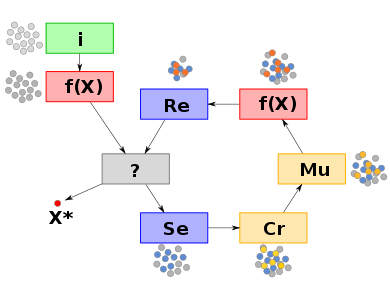

### Version de base

Le choix du modèle et le code en Python capable de résoudre des instances de taille importante (plusieurs milliers de villes)

Une étude statistique du comportement expérimental de l'algorithme



# Représentation formelle des données

---

<aside>
💡 On considère pour la suite :

<br>

Le graphe pondéré non orienté $G = (X, A, \mathcal{G})$ avec X l’ensemble des sommets tel que $x \in X$ est appelé sommet.

A une partie de $X\times X$, l’ensemble des arrêtes tel que : $\overline{u} \in \rm A$ où $\overline{u}$ est une arrête de G.

On considère l’application $\mathcal{l}: A \to \mathbb{N}$ renvoyant le poids d’une arrête de $A$.

On considère l’application $\mathcal{p}: A \to \mathbb{N}$ renvoyant le poids d’une arrête de $A$.

On considère l’application $\mathcal{deg}: X \to \mathbb{N}$ renvoyant le degrès d’un sommet de X.

On supposera:

- $G$ connexe
- Sans puits $\leftrightarrow \forall x \in X, deg(x) > 1$
- Sans boucle $\leftrightarrow \forall \overline{u} \in A, \forall x \in X, \nexists \overline{u} = (x,x)$



## La tournée des villes :

La tournée se représente sous forme de graphe.
Ce graphe est pondéré où chaque point représente une ville et le poids de chaque arête correspond à une route.

    Mettre un graphe

Ce graphe est connexe car chaque ville est au minimum relié à une autre ville par une route.
Il est aussi incomplet car toutes les villes ne sont pas reliées directement entre elles.
Le graphe est non orienté, il n'y a donc pas de sens unique dans le parcours.



### Les routes :

Sur le graphe chaque arête représente une route.

Le graphe étant pondéré, le poids de chaque route correspond au temps qu’il faut pour la parcourir en tenant compte du trafic et de toute autre contrainte pouvant influencer sur le temps.



# Représentation formelle du problème

---

Le problème consiste à trouver le chemin de plus courte durée pour réaliser la tournée d’un ensemble de ville. Entre autres, à partir d’un graphe il faut partir d’un point A, parcourir l’ensemble des points du graphe, et revenir à ce même point A en un minimum de temps possible. De plus, il faut pouvoir minimiser la durée totale de la tournée en tenant compte du trafic sur chaque route mais aussi de toute autre contrainte pouvant nous faire perdre du temps.



# Représentation formelle de l’objectif à optimiser

---

## Données :

- Le graphe G
- Une liste $L$ de sommets appartenant à G
- Un point de départ D



## Données :

- Le graphe G
- Une liste $L$ de sommets appartenant à G
- Un point de départ D



## Problème

Existe-t-il une tournée passant au moins une fois par chacune de nos villes de _G_ et dont le temps de la tournée est minimal ?

Soit $\mu$ un chemin, on obtient donc la longueur d’un chemin $\mathcal{l}(\mu) = \sum_{u\in\mu} \mathcal{l}(u)$

Le but est donc de minimiser $\mathcal{l}(\mu)$

<aside>
<br>

⚠️ **Contraintes :** <br>

- **Essence :**
  Gestion de la consommation en essence. Proposer le parcours le plus rapide et le parcours le plus économique en essence. <br>
- **Péage :**
  Plusieurs autoroutes seront disposées dans le graphe. Afin d’accéder à ces autoroutes il faudra payer le péage. On pourra alors décider d’éviter les péages mais cela peut entraîner des coûts supplémentaires
  <br>
- **Temps supplémentaire avec le traffic:**
  Le temps de parcours d’une arête varie au cours du temps pour représenter la variation du trafic. Un coefficient sera ajouté au temps de trajet de la route

</aside>



# Complexité théorique du problème

---

Pour réaliser la tournée, nous devons trouver un algorithme afin de trouver un cycle hamiltonien (Tournée plus retours au point de départ).

Nous avons choisi de réduire notre problème au problème du **_Voyageur de commerce_**

> Il s’agit d’un problème d'optimisation qui consiste à déterminer, étant donné une liste de villes et les distances entre toutes les paires de villes, le plus court circuit qui passe par chaque ville une et une seule fois.

Malgré la simplicité de l’énoncé, on ne connaît pas d'algorithme permettant de trouver une solution exacte rapidement dans tous les cas. Plus précisément, on ne connaît pas d'algorithme en temps polynomial, et la version décisionnelle du problème du voyageur de commerce

Le voyageur du commerce souhaite répondre à la question suivante : Pour une distance D, existe-t-il un chemin plus court que D passant par toutes les villes et qui termine dans la ville de départ ?

Ce problème d’optimisation est un problème NP-complet, ce qui est un indice de sa difficulté.

Pour montrer que le problème du voyageur de commerce est NP-Complet, il faut d’abord montrer qu’il est NP-Difficile. Pour cela nous allons faire une réduction à partir du problème de Cycle Hamiltonien qui, nous le savons déjà, est NP-Complet.

Nous allons donc transformer, en temps polynomial, une instance du Cycle Hamiltonien en instance du Voyageur de Commerce, de façon que les deux instances admettent la même réponse.

$\forall\:problèmes\,p, \;p \in \mathcal{NP}-complet \leftrightarrow p \in \mathcal{NP}-Difficile\, \cap \mathcal{NP}$



### Exemple du voyageur de commerce:

Vérification de l’appartenance à NP

Le problème est dans NP car étant donné une suite de sommets, on peut vérifier en temps polynomial (plus précisément en temps linéaire) si c’est un circuit, s’il passe au moins une fois par chaque sommet, et si son coût est inférieur à _k_.

Vérification de l’appartenance à NP-Difficile

Voyageur de Commerce considère un graphe complet arête-valué, mais qu'il autorise à passer plusieurs fois par certains sommets, du moment que le circuit total est de taille inférieure à _k_ (on considère le problème de décision sur lequel est basé le problème d'optimisation, _k_ est donc un paramètre d'entrée).

L'idée générale de cette réduction polynomiale est de construire l’instance de Cycle Hamiltonien en rajoutant les arêtes manquantes, mais avec une valeur de 2 (et en considérant une valeur de 1 pour les arêtes déjà présentes) de manière à rendre leur usage trop couteux, et en considérant un _k_ correspondant au nombre de sommets (on notera que cette transformation se fait en temps polynomial).

![photo.jpg](img\photo.jpg)

De cette manière, si la réponse à l'instance de Voyageur de Commerce est _oui_, on sait que le circuit auquel correspond cette réponse passe une et une seule fois par les sommets du graphe, et n'emprunte que les arêtes du graphe de Cycle Hamiltonien. Tout cycle empruntant une des arêtes manquantes dans Cycle Hamiltonien aurait une taille supérieure à _k_, puisque les autres arêtes qu'on a ajoutées ont une taille supérieure à 1. Idem pour les cycles passant plusieurs fois par un sommet. Donc la réponse pour l'instance de Cycle Hamiltonien est _oui_ aussi. Idem si la réponse est _non_. Puisqu'on est capable de transformer en temps polynomial une instance de Cycle Hamiltonien en instance de Voyageur de Commerce, de manière à conserver la réponse, Voyageur de Commerce est au moins aussi difficile que Cycle Hamiltonien. Comme Cycle Hamiltonien est NP-Difficile, et que Voyageur de Commerce est dans NP, Voyageur de Commerce est NP-Complet.



# Problème d’optimisation



## Modélisation du problème

Commençons par modéliser le problème sous la forme d'un programme linéaire. <br />



### Variables de décision du programme

Sommet[] = Liste des sommets(villes) de la tournée

M = matrice d’adjacence du graphe G

Prix_essence = Prix de l’essence à l’heure actuelle

Total_price = Prix total de la route



### Contraintes du programme

Les contraintes sont des conditions sur l'usage des ressources, c'est à dire des conditions que doivent respecter les valeurs des variables de décision pour former une solution _admissible_.

<blockquote>
Contrainte 1:

Soit $\mu$ un chemin, on obtient donc la longueur d’un chemin, minimiser la longueur du chemin donc minimiser : $\mathcal{l}(\mu) = \sum_{u\in\mu} \mathcal{l}(u)$

Contrainte 2 : Avoir le parcours le plus économique

Minimiser le coût du parcours donc minimiser $\mathcal{p}(\mu) = \sum_{u\in\mu} \mathcal{p}(u)$

Contrainte 3 : Éviter les péages

$\displaystyle\sum_{i=1}^{n}{Sommet_i} = 0$

Contrainte 4 : Ajouter du temps de trajet lors des heures d’embouteillage

$$
7\leq time \leq 8 \rightarrow time = time \times [1.1,2[
$$

$$
12\leq time \leq 13 \rightarrow time = time \times [1.1,2[
$$

$$
17\leq time \leq 18 \rightarrow time = time \times [1.1,2[
$$

Contrainte de non négativité :

$\mathcal{l}(\mu)\space et \space \mathcal{p}(\mu) \geq 0 ~\forall \mu \in[1, n] \space avec \space n\space la \space longueur \space du \space tableau$

</blockquote>



### Fonction économique

La fonction économique décrit ce qu'on veut optimiser lors de l'usage de nos ressources. C'est donc une fonction de nos variables de décision, que l'on doit maximiser ou minimiser. Comme pour les contraintes, dans un programme linéaire, cette fonction économique doit être elle-même linéaire.

<blockquote>
La fonction économique doit minimiser le coût de la tournée, soit :<br />
</blockquote>

$$
F (Sommet_1, Sommet_n) = \displaystyle\sum_{i=1}^{n} total_price
$$ 
<br />




### 1.1.4 Programme linéaire complet

$$
\begin{array}{rl@{}ll}
\text{Minimiser}  & \mathcal{l}(\mu) = \sum_{u\in\mu} \mathcal{l}(u) \\
\text{s.c.}& \mathcal{p}(\mu) = \sum_{u\in\mu} \mathcal{p}(u) & \geq 0\\
& \displaystyle\sum_{i=1}^{n}{Sommet_i}& \geq 0\\
& 7\leq time \leq 8 \rightarrow time = time \times [1.1,2[ \\
& 12\leq time \leq 13 \rightarrow time = time \times [1.1,2[ \\
& 17\leq time \leq 18 \rightarrow time = time \times [1.1,2[
\end{array}
$$
    


### Complexité de l'Algorithme


![algo.jpg](img\algo.jpg)



### Notes et réfèrences

[Théorie des graphes](https://moodle-ingenieurs.cesi.fr/pluginfile.php/495242/mod_resource/content/4/res/ressources_TI_-_graphes.pdf)

[Algorithme évolutionniste](https://fr.wikipedia.org/wiki/Algorithme_évolutionniste)

[Algorithme Génétique](https://antoinevastel.com/algorithme/python/algorithmes%20g%C3%A9n%C3%A9tiques/2016/04/30/probleme-voyageur-commerce.html#:~:text=Un%20algorithme%20g%C3%A9n%C3%A9tique%20est%20constitu%C3%A9,Cr%C3%A9ation%20de%20nouveaux%20individus)


# Algorithme génétique

L’algorithme génétique est un **algorithme évolutionniste** (faire évoluer notre ensemble de solution afin de trouver le meilleur résultat) il s’inspire de la théorie de l’évolution des espèces.

Il va nous permettre de résoudre notre problème d’optimisation dans un temps raisonnable. 

## Avantages



## Etapes

On peut diviser en 5 étapes notre algorithme :

1. Création d'une population initiale.
2. Evaluation de la "fitness" (qualité) des individus
3. Création de nouveaux individus
4. Ajout des nouveaux individus dans la population
5. Retour à la seconde étape

![algo.jpg](img\Org_Algo_Gene.png)



## Paramètres

Pour utiliser l'algorithme génétique, il nous faut définir :

|Paramètre |Variable  | Valeur|
|:---|:---:| :---:|
|Nombre de ville| N | 5|
|Population initiale| D (Dimension)| 10|
|Un chromosone de N gènes une solution  | Cp (Chemin parcouru) |Chaque gène = Numéro de la ville|
|L'opérateur de croisement | Pc (Probabilité croisement) | 0.8|
|L'opérateur de mutation | Pm (Probabilité mutation)| 0.001|
|Le nombre de génération. | Ng (Nombre génération)| 50|

## Définitions

### Population

La population est un sous-ensemble de toutes les solutions possibles au problème donné. (Dans notre cas tous les chemins possible)

### Chromosome 

Un chromosome est l'une de ces solutions à ce problème actuel. (Un chemin possible)

### Gène

Chaque chromosone est composé d'un ensemble de gène. (Chaque gène représente une ville)

![Schéma explicatif](img\SchémaAlgo.png)



### Fitness

La fitness représente la qualité de la solution, ici nous devons trouver la distance minimal afin d'effectuer une tournée. <br> 
La fitness représente donc le chemin parcouru par la solution trouvé.

In [ ]:
def fitness(chromosome):
    distance = 0
    actuel = 0
    dest = 0
    for i in range(len(chromosome)):
        for j in range(0, 10):
            if chromosome[i][j] == 0:
                actuel = j
            try:
                if chromosome[i+1][j] == 0:
                    dest = j
                    distance += chromosome[i][dest][1]
            except:
                pass
    return distance

### Croisement

Le croisement permet de fusionner deux parents (Chromosome) afin de créer un ou deux enfant. <br> 
Nous utilisons dans notre programme un croisement en un point. (Voir le schema suivant)

![Crossover](img\AlgoGene_crossover.png)



### Mutation

La mutation permet d'apporter de la diversité au chromosone en lui changeant un ou plusieurs gène. <br>
Nous utilisons deux types de mutation avec un pourcentage de chance 50 % chacun : <br>

- Swap Bit mutation : Echange de deux ville dans le chromosone.

  ![Swap Bit](img\AlgoGen_SwapBit.png)

- Mutation inverse : Inversement de deux ville.
  
  ![Inverse Mutation](img\AlgoGen_inverseMutation.png)


In [ ]:
def mutation(chromosone, probMutation, nbVille):
    
    if probMutation > random.randint(0,100):
        firstGene = random.randint(0, nbVille)
        secondGene = random.randint(0, nbVille)
        chromosone[firstGene], chromosone[secondGene] = chromosone[secondGene], chromosone[firstGene]
        

In [1]:
N = 5
D = 1000
Cp = []
Pc = 0.8
Pm = 0.001
Ng = 50

In [2]:
# on génère une matrice vide
def generate_matrice(M,N):
    matrice = []
    for i in range(M):
        line=[]
        for j in range(N):
            line.append(0)
        matrice.append(line)
    return matrice

In [3]:
# on créer la structure des champs qui vont composer notre matrice
def field(matrice, i, j):
    inf = 1
    sup = 50
    _cost_essence = 1.80
    
    field = []
    km=(70, 80, 90, 110, 130)
    dist = randint(inf, sup)
    velocity = random.choice(km)
    time = round((dist/velocity)*60)
    conso = 8
    peage_cost = 0
    if velocity == 130:
        conso += conso*0.2
        peage_cost += round((1.9+4.5*(dist/sup)),1)
    elif velocity == 110:
        conso += conso*0.15
    price_essence = round((((dist*conso)/100) * _cost_essence),1)
    total_price = round((peage_cost + price_essence),1)
    field.append(1)
    field.append(dist)
    field.append(velocity) #supprimer
    field.append(time)
    field.append(conso)
    field.append(peage_cost)
    field.append(price_essence)
    field.append(total_price)
    # on renseigne ensuite le champs pour avoir la chemin entre les deux villes
    matrice[i][j] = field
    matrice[j][i] = field

In [4]:
# on complète la matrice en générant deux champs pour chaque ville
def complete_matrice(matrice, M):
    for i in range(M):
        _nb_element = 2
        _element = random.sample(range(M), _nb_element)
        try:
            for j in _element:
                if i != j :
                    field(matrice, i, j)
        except:
            _element = []
            _element = random.sample(range(M), _nb_element)
        finally:
            for j in _element:
                if i != j :
                    field(matrice, i, j)
        _element = []
    return matrice

In [5]:
def organize_matrice(matrice):
    for i in range(0, len(matrice)):
        for j in range(i+1, len(matrice)):
            matrice[j][i] = matrice [i][j] 

In [6]:
def info_matrice(matrice):
    _map = {}
    _list = []

    dico = {
    "bool_chemin": None,
    "voisin": None,
    "distance": None, 
    "vitesse": None, # supprimer
    "temps": None,
    "consommation": None,
    "peage": None,
    "cout": None,
    "total": None
    }
    
    for i in range(0, len(matrice)):
        _list.clear()
        for j in range(0, len(matrice)):
            if matrice[i][j] != 0:
                dico["bool_chemin"] = matrice[i][j][0]
                dico["voisin"] = j
                dico["distance"] = matrice[i][j][1]
                dico["vitesse"] = matrice[i][j][2]
                dico["temps"] = matrice[i][j][3]
                dico["consommation"] = matrice[i][j][4]
                dico["peage"] = matrice[i][j][5]
                dico["cout"] = matrice[i][j][6]
                dico["total"] = matrice[i][j][7]
                _list.append(copy.deepcopy(dico))    
        _map[i] = copy.deepcopy(_list)
    return _map

In [7]:
def affiche_matrice(matrice):
    for line in matrice:
        print(line)

In [8]:
class GraphVisualization:
   
    def __init__(self):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = []
          
    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
          
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()
        
# Calcul voisins
def voisinsSommetGrapheMatrice(matrice, sommet):
    liste = matrice[sommet]
    voisins = \
        [i for i, value in enumerate(liste) if liste[i] != 0] #SOLUTION
    return voisins

In [9]:
matrice = generate_matrice(1000, 1000)
complete_matrice(matrice, 1000)
organize_matrice(matrice)
affiche_matrice(matrice)
dico = info_matrice(matrice)

print(dico)

with open('C:\\Users\\Utilisateur\\Desktop\\myfile.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    mywriter.writerows(matrice)

# Code
G = GraphVisualization()


for sommet in range(len(matrice)):
    voisins = voisinsSommetGrapheMatrice(matrice, sommet)      # on procède en deux temps, car
    print("sommet", str(sommet), ":", str([v for v in voisins])) # les indices commencent à 0
    for v in voisins:
        G.addEdge(sommet, v)
    
G.visualize()

NameError: name 'random' is not defined